In [2]:
!pip install keras

  Using cached https://files.pythonhosted.org/packages/54/e8/eaff7a09349ae9bd40d3ebaf028b49f5e2392c771f294910f75bb608b241/Keras-2.1.6-py2.py3-none-any.whl
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/envs/py2env/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


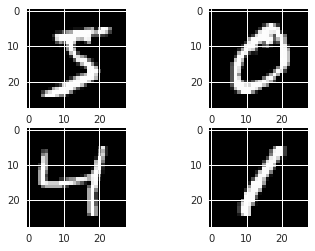

In [4]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [5]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K


In [6]:
X_train1 = X_train[y_train==1]

In [7]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],num_pixels ).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [8]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_train.shape[1]

In [9]:
model = Sequential()
model.add(Dense(1000, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.5001 - acc: 0.8638 - val_loss: 0.2323 - val_acc: 0.9341

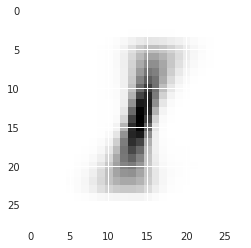

In [10]:
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range(X_train1.shape[0]):
  pic2=X_train1[i,:,:]
  pic=pic+pic2
pic=(pic/X_train1.shape[0])
plt.imshow(pic)

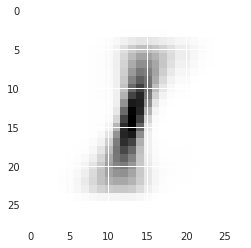

In [13]:
for i in range(pic.shape[0]):
  if i<20:
    pic[:,i]=pic[:,i+1]
plt.imshow(pic)

In [14]:
model.predict(pic.reshape(1,784))

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [15]:
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range(X_train1.shape[0]):
  pic2=X_train1[i,:,:]
  pic=pic+pic2
pic=(pic/X_train1.shape[0])


In [16]:
model.predict(pic.reshape(1,784))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

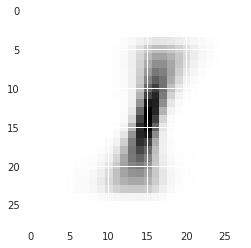

In [19]:
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range(X_train1.shape[0]):
  pic2=X_train1[i,:,:]
  pic=pic+pic2
pic=(pic/X_train1.shape[0])
pic2=np.copy(pic)
for i in range(pic.shape[0]):
  if ((i>6) & (i<26)):
    pic[:,i]=pic2[:,(i-1)]
plt.imshow(pic)


In [20]:
model.predict(pic.reshape(1,784))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

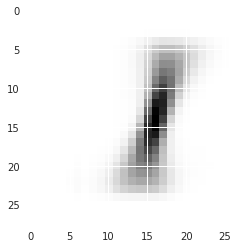

In [21]:
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range(X_train1.shape[0]):
  pic2=X_train1[i,:,:]
  pic=pic+pic2
pic=(pic/X_train1.shape[0])
pic2=np.copy(pic)
for i in range(pic.shape[0]):
  if ((i>6) & (i<26)):
    pic[:,i]=pic2[:,(i-2)]
plt.imshow(pic)


In [22]:
model.predict(pic.reshape(1,784))

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)